# Experiment of fractional exponent to particle filter

1. generate some samples
1. estimate the distribution (discrete)
1. generate reduced distributions by different processes
    1. proc1
        1. directly apply the fractional exponent to the estimated dist with normalization
    1. proc2
        1. calculate weights (proposed method!)
        1. resampling
        1. estimate the distribution based on the resampled ones
1. compare the two distributions


In [1]:
import random
import math
import matplotlib.pyplot as plt

# generate some samples

In [2]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
samples = []
for i in range(n_samples):
    samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))
    #samples.append(random.uniform(rng[0], rng[1]))
    #samples.append(random.gauss((rng[0]+rng[1])/2.0, (rng[1]-rng[0])/2.0 * 0.1))
print("max: " + str(max(samples)))
print("min: " + str(min(samples)))

max: 89.99911646732066
min: 10.43238488321168


# estimate the distribution (discrete)

In [3]:
sigma = 5
k = lambda x1, x2: math.exp(-(x1 - x2)**2/sigma/sigma)
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = []
p = [0] * N
for i in range(N):
    x = rng[0] + i * dlt
    x_axis += [x]
    for s in samples:
        p[i] += k(x, s)
sum_p = sum(p) * dlt
for i in range(len(p)):
    p[i] /= sum_p

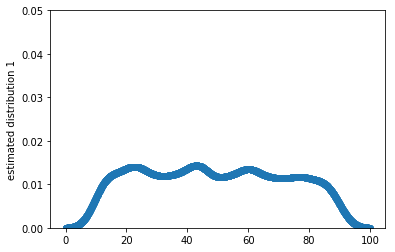

sum: 1.0


In [4]:
plt.scatter(x_axis, p)
plt.ylabel('estimated distribution 1')
plt.ylim(0, 0.05)
plt.show()
print('sum: ' + str(sum(p)*dlt))

# generate reduced distributions by different processes

In [5]:
omega = 0.1

# proc1
1. directly apply the fractional exponent to the estimated dist with normalization

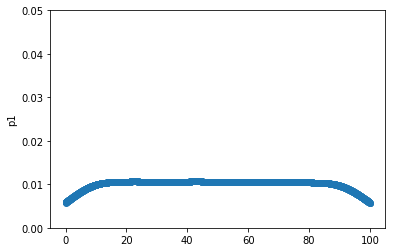

sum: 1.0000000000000009


In [6]:
p1 = [0] * len(p)
sum_p1 = 0
for i in range(len(p)):
    p1[i] = math.pow(p[i], omega)
    sum_p1 += p1[i] * dlt
for i in range(len(p1)):
    p1[i] /= sum_p1
plt.scatter(x_axis, p1)
plt.ylabel('p1')
plt.ylim(0, 0.05)
plt.show()
print('sum: ' + str(sum(p1)*dlt))

# proc2
1. calculate weights (proposed method!)
1. resampling
1. estimate the distribution based on the resampled ones

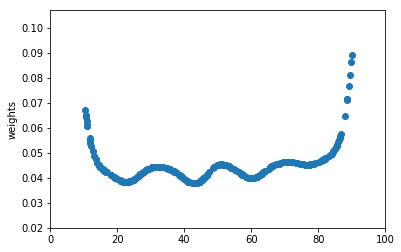

In [7]:
weights = [0] * n_samples
for i in range(n_samples):
    for j in range(n_samples):
        weights[i] += k(samples[i], samples[j])
    weights[i] = math.pow(weights[i], omega - 1)
plt.scatter(samples, weights)
plt.ylabel('weights')
#plt.ylim(0, 0.2)
plt.xlim(rng[0], rng[1])
plt.show()

In [8]:
next_samples = [0] * n_samples
sum_weight = sum(weights)
print('sum of weights: ' + str(sum_weight))
for i in range(n_samples):
    r = random.uniform(0.0, sum_weight)
    temp = 0
    for j in range(n_samples):
        temp += weights[j]
        if r <= temp or j == n_samples - 1:
            next_samples[i] = samples[j]
            break

sum of weights: 13.402710454482119


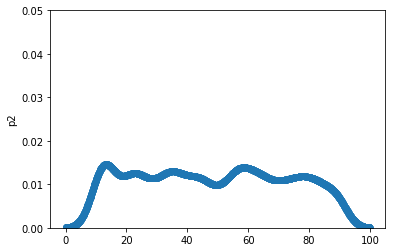

sum: 0.9999999999999956


In [9]:
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = []
p2 = [0] * N
for i in range(N):
    x = rng[0] + i * dlt
    x_axis += [x]
    for s in next_samples:
        p2[i] += k(x, s)
sum_p2 = sum(p2) * dlt
for i in range(len(p2)):
    p2[i] /= sum_p2
plt.scatter(x_axis, p2)
plt.ylabel('p2')
plt.ylim(0, 0.05)
plt.show()
print('sum: ' + str(sum(p2)*dlt))

# compare the two distributions

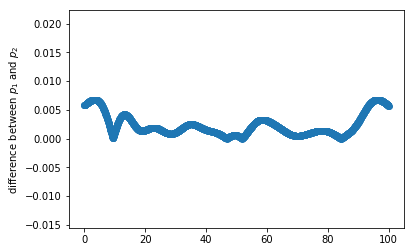

In [10]:
diff = [0] * len(p)
for i in range(len(diff)):
    diff[i] = abs(p1[i] - p2[i])
plt.scatter(x_axis, diff)
plt.ylabel('difference between $p_1$ and $p_2$')
#plt.ylim(0, 0.01)
plt.show()

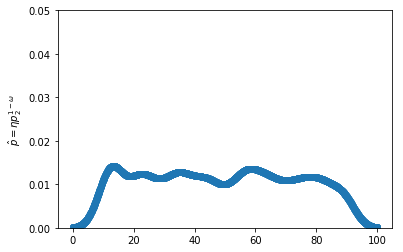

sum: 1.0000000000000027


In [11]:
p_hat = [0] * len(p)
p_hat_sum = 0
for i in range(len(p_hat)):
    p_hat[i] = math.pow(p2[i], 1 - omega)
    p_hat_sum += p_hat[i]*dlt
for i in range(len(p_hat)):
    p_hat[i] /= p_hat_sum
plt.scatter(x_axis, p_hat)
plt.ylabel('$\hat{p}=\eta p_2^{1-\omega}$')
plt.ylim(0, 0.05)
plt.show()
print('sum: ' + str(sum(p_hat)*dlt))

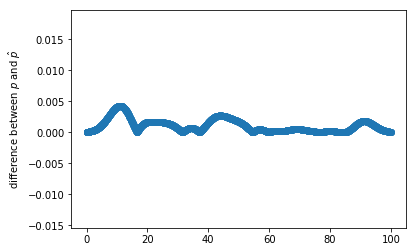

In [12]:
diff = [0] * len(p_hat)
for i in range(len(diff)):
    diff[i] = abs(p[i] - p_hat[i])
plt.scatter(x_axis, diff)
plt.ylabel('difference between $p$ and $\hat{p}$')
#plt.ylim(0, 0.01)
plt.show()